# AIFFEL_1st_Hackathon :: 8조 baseline.v1
---

## 데이터 살펴보기
---

### 데이터 불러오기

In [72]:
import os
from os.path import join

import pandas as pd
import numpy as np
import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autotime

time: 222 µs (started: 2021-02-09 16:52:03 +09:00)


In [3]:
!pwd

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/2.code


In [5]:
# workspace_dir을 pwd에서 확인한 본인의 주소로 바꿔주세요
workspace_dir = os.getenv('HOME') + '/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon'

In [110]:
data_dir = workspace_dir + '/1.data'
code_dir = workspace_dir + '/2.code'
submission_dir = workspace_dir + '/3.submission'

train_data_path = join(data_dir, 'sales_train.csv')
test_data_path = join(data_dir, 'test.csv')
sample_submission_data_path = join(data_dir,'sample_submission.csv')
item_categories_data_path = join(data_dir, 'item_categories.csv')
items_data_path = join(data_dir, 'items.csv')
shops_data_path = join(data_dir, 'shops.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
sample_submission = pd.read_csv(sample_submission_data_path)
item_categories = pd.read_csv(item_categories_data_path)
items = pd.read_csv(items_data_path)
shops = pd.read_csv(shops_data_path)

print('train data dim : {}'.format(train.shape)) # 훈련 데이터 형태
print('test data dim : {}'.format(test.shape))    # 시험 데이터 형태
print('submission dim : {}'.format(sample_submission.shape)) # 제출 샘플 데이터 형태
print('item_categories data dim : {}'.format(item_categories.shape)) # 아이템 카데고리 데이터 형태
print('items data dim : {}'.format(items.shape)) # 아이템 데이터 형태
print('shops data dim : {}'.format(shops.shape)) # 상점 데이터 형태

train data dim : (2935849, 6)
test data dim : (214200, 3)
submission dim : (214200, 2)
item_categories data dim : (84, 2)
items data dim : (22170, 3)
shops data dim : (60, 2)
time: 1.01 s (started: 2021-02-09 17:07:00 +09:00)


### 데이터 살펴보기

✊ 차후 EDA 문서와 통합

## 전처리
---

### 결측치 탐색

#### train
- train 데이터의 결측치를 확인하고, 그에 대한 처리를 진행한다.

In [12]:
np.sum(pd.isnull(train))

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

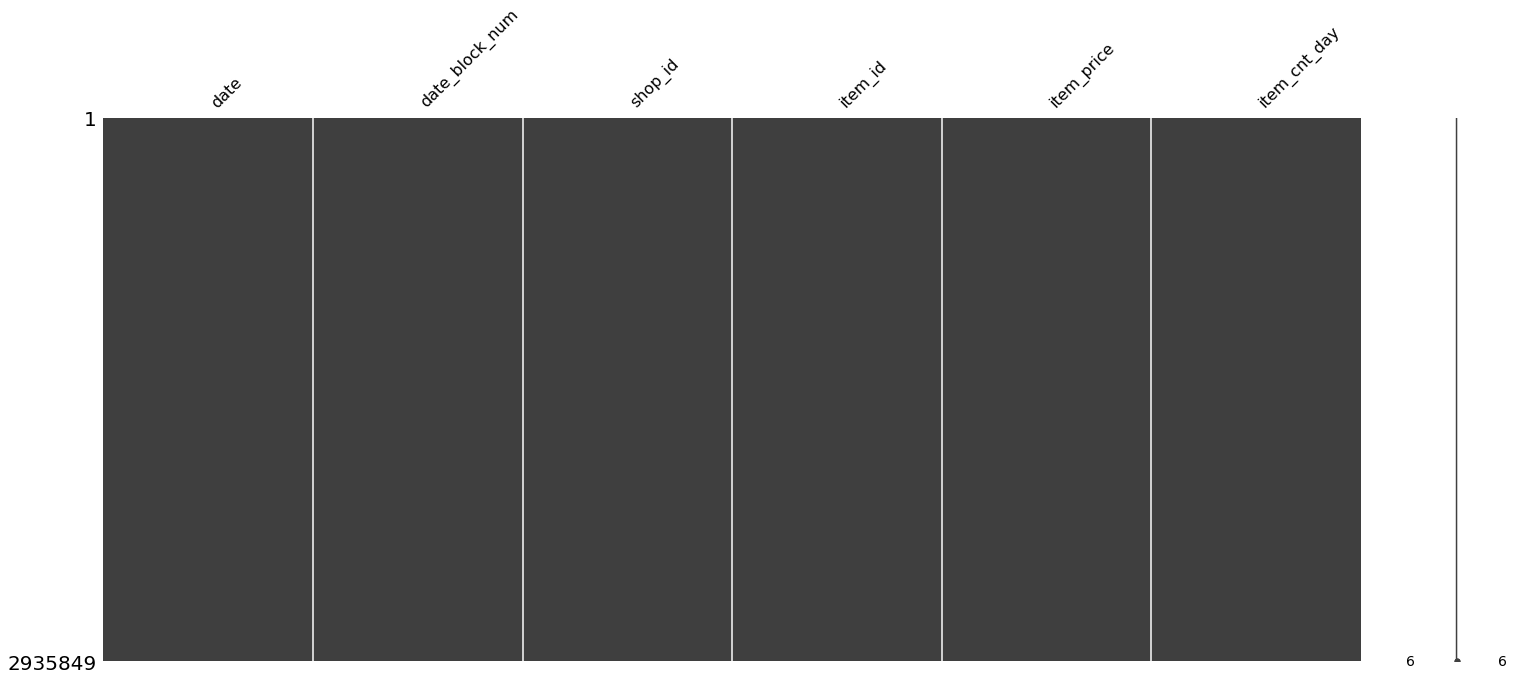

In [11]:
msno.matrix(train)

- train 데이터에서는 결측치가 확인되지 않았다.

#### test

In [13]:
np.sum(pd.isnull(test))

ID         0
shop_id    0
item_id    0
dtype: int64

- test 데이터에서도 결측치가 확인되지 않았다.

### 이상치 변경

- 너무 높은 `item_price`를 가진 데이터 제거

In [43]:
high_price_row = train[train['item_price'] > 100000]
high_price_row

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [44]:
train = train.drop(high_price_row.index)
train[train['item_price'] > 100000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


- `item_price`가 음수인 데이터 제거

In [45]:
minor_price_row = train[train['item_price'] < 0]
minor_price_row

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [46]:
train = train.drop(minor_price_row.index)
train[train['item_price'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


- 너무 높은 `item_cnt_day`를 가지는 데이터 제거

In [47]:
high_cnt_row = train[train['item_cnt_day'] > 2000]
high_cnt_row

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2909818,28.10.2015,33,12,11373,0.908714,2169.0


In [48]:
train = train.drop(high_cnt_row.index)
train[train['item_cnt_day'] > 2000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


-  `item_cnt_day`가 음수인 데이터 제거

In [49]:
minor_item_cnt_row = train[train['item_cnt_day'] < 0]
minor_item_cnt_row

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


In [50]:
train = train.drop(minor_item_cnt_row.index)
train[train['item_cnt_day'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


### 불필요한 Column 제거

- train 데이터에서 `date`, `item_price`를 제거한다.

In [51]:
train = train.drop(['date', 'item_price'], axis=1)
train

,date_block_num,shop_id,item_id,item_cnt_day
0,0,59,22154,1.0
1,0,25,2552,1.0
3,0,25,2554,1.0
4,0,25,2555,1.0
5,0,25,2564,1.0
...,...,...,...,...
2935844,33,25,7409,1.0
2935845,33,25,7460,1.0
2935846,33,25,7459,1.0
2935847,33,25,7440,1.0


### train 데이터 분포 확인

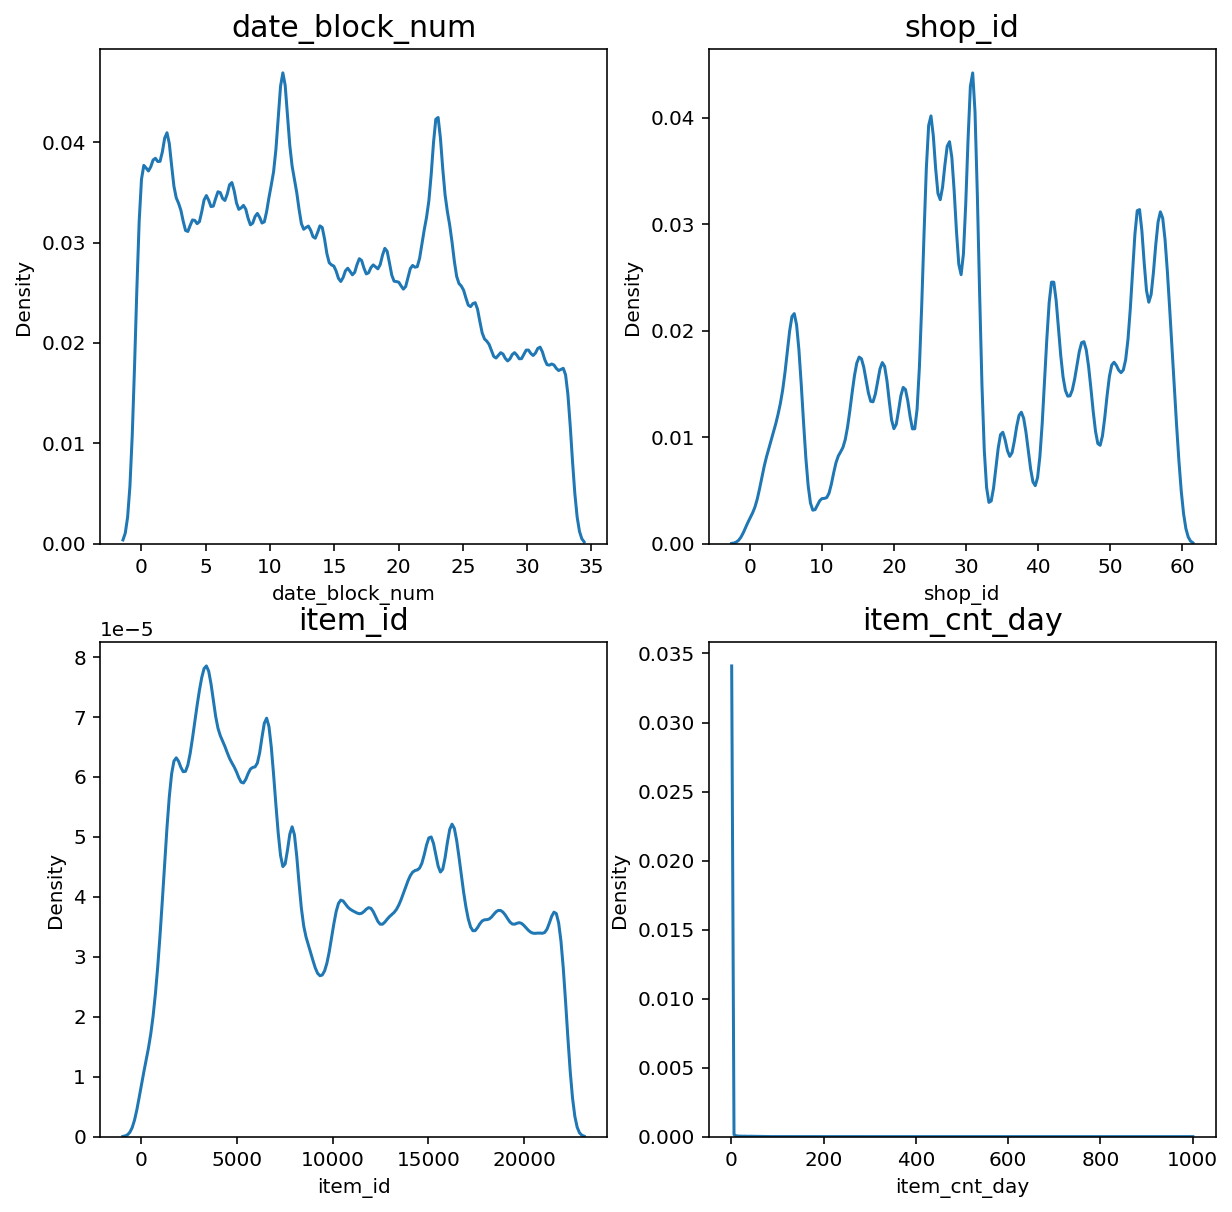

In [58]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10)) 

count = 0
columns = train.columns
for row in range(2):
    for col in range(2):
        sns.kdeplot(train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 4 :
            break

- `item_cnt_day` 데이터가 한 쪽으로 치우쳐진 경향을 보이고 있다.
- `item_cnt_day`에 대하여 log-scaling을 진행하여 데이터의 분포를 고르게 변화시켜 준다.

In [63]:
train['item_cnt_day'] = np.log1p(train['item_cnt_day'].values)

/home/aiffel-dj1/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


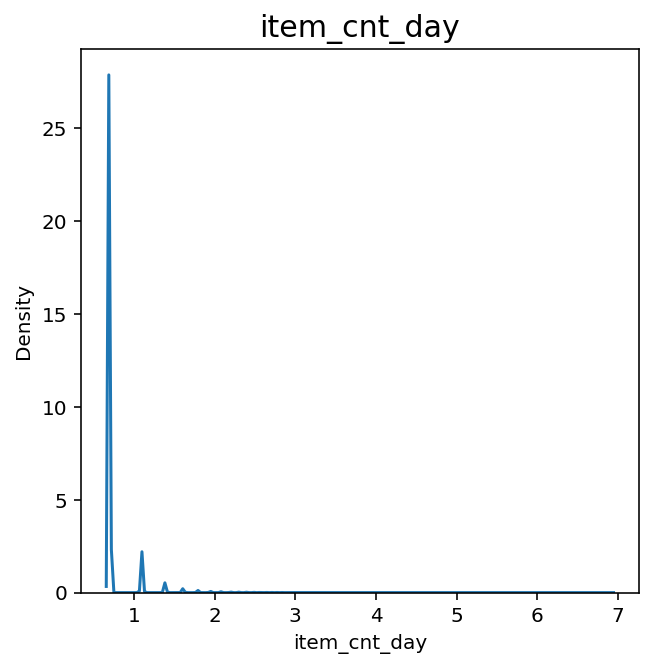

In [64]:
fig, ax = plt.subplots(1, figsize=(5, 5)) 
sns.kdeplot(train['item_cnt_day'], ax=ax)
ax.set_title('item_cnt_day', fontsize=15)
fig.show()

### train 데이터 분리

In [65]:
y = train['item_cnt_day']
x_train = train.drop(['item_cnt_day'], axis=1)

print(x_train.columns)

Index(['date_block_num', 'shop_id', 'item_id'], dtype='object')


### Test 데이터 가공

- test 데이터에 `date_block_num` column을 추가하고 모든 값은 34로 채운다.
- `ID`를 변수 `sub_id`에 저장하고, ID를 test에서 제거한다.

In [68]:
test["date_block_num"] = 34
test.tail(10)

,ID,shop_id,item_id,date_block_num
214190,214190,45,3280,34
214191,214191,45,4393,34
214192,214192,45,4352,34
214193,214193,45,18049,34
214194,214194,45,18027,34
214195,214195,45,18454,34
214196,214196,45,16188,34
214197,214197,45,15757,34
214198,214198,45,19648,34
214199,214199,45,969,34


In [ ]:
sub_id = test["ID"]
test = test.drop(['ID'], axis=1)

In [102]:
test

,shop_id,item_id,date_block_num
0,5,5037,34
1,5,5320,34
2,5,5233,34
3,5,5232,34
4,5,5268,34
...,...,...,...
214195,45,18454,34
214196,45,16188,34
214197,45,15757,34
214198,45,19648,34


time: 6.21 ms (started: 2021-02-09 17:02:07 +09:00)


## 모델 선정 및 학습

In [74]:
from sklearn.linear_model import LinearRegression # 일반 회귀 모델
from sklearn.linear_model import Ridge, Lasso, ElasticNet # norm 규제 회기 모델
from sklearn.linear_model import ARDRegression, BayesianRidge # 베이지안 회귀
from sklearn.ensemble import RandomForestRegressor # 앙상블 모델, bagging
from sklearn.ensemble import GradientBoostingRegressor # 앙상블 모델, boosting
import xgboost as xgb # 앙상블 모델, boosting
import lightgbm as lgb # 앙상블 모델, boosting

from sklearn.model_selection import KFold, cross_val_score

time: 802 µs (started: 2021-02-09 16:53:02 +09:00)


In [77]:
rs = 2021
gboost = GradientBoostingRegressor(random_state=rs)
xgboost = xgb.XGBRegressor(random_state=rs)
lightgbm = lgb.LGBMRegressor(random_state=rs)

# models = [{'model':gboost, 'name':'GradientBoosting'}, 
#           {'model':xgboost, 'name':'XGBoost'},
#           {'model':lightgbm, 'name':'LightGBM'}]

models = [{'model':lightgbm, 'name':'LightGBM'}]

time: 809 µs (started: 2021-02-09 16:56:05 +09:00)


### Cross Validation을 이용한 모델 성능평가

In [78]:
def get_cv_score(models, n, random_state, x, y):
    kfold = KFold(n_splits=n,
                  random_state=random_state).get_n_splits(x.values)
    for m in models:
        print("Model {} CV score : {:.4f}".format(m['name'], 
                                                   np.mean(cross_val_score(m['model'], x.values, y, cv=kfold)), 
                                                   ))

time: 478 µs (started: 2021-02-09 16:56:06 +09:00)


In [79]:
get_cv_score(models, 5 , rs, x_train, y)

/home/aiffel-dj1/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Model LightGBM CV score : 0.1876
time: 26.6 s (started: 2021-02-09 16:56:07 +09:00)


### 모델 저장

## Submittion

### 예측

In [80]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    
    return np.mean(predictions, axis=1)

time: 595 µs (started: 2021-02-09 16:56:49 +09:00)


In [103]:
y_pred = AveragingBlending(models, x_train, y, test)

time: 4.95 s (started: 2021-02-09 17:02:19 +09:00)


In [105]:
y_pred = np.expm1(y_pred)

time: 694 µs (started: 2021-02-09 17:04:36 +09:00)


In [106]:
sub = pd.DataFrame(data={'ID': sub_id,'price':y_pred})
sub

,ID,price
0,0,1.028204
1,1,1.028204
2,2,1.028204
3,3,1.028204
4,4,1.028204
...,...,...
214195,214195,1.041228
214196,214196,1.041228
214197,214197,1.041228
214198,214198,1.041228


time: 7.86 ms (started: 2021-02-09 17:04:38 +09:00)


### submission 파일 저장

In [113]:
sample_submission['item_cnt_month'] = y_pred
sample_submission.head()

,ID,item_cnt_month
0,0,1.028204
1,1,1.028204
2,2,1.028204
3,3,1.028204
4,4,1.028204


time: 6.16 ms (started: 2021-02-09 17:09:17 +09:00)


In [114]:
submission_csv_path = join(submission_dir, 'baseline.csv')
sample_submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/home/aiffel-dj1/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon/3.submission/baseline.csv
time: 447 ms (started: 2021-02-09 17:09:19 +09:00)
